In [17]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution, minimize

air = ml.Non_Dispersion(1)
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
NB = ml.open_material('Nb2O5_Nanya', 'Material')
ITO2 = ml.open_material('ITO_Nanya', 'Material')
ITO1 = ml.open_material('ITO1_Nanya', 'Material')
OC = ml.open_material('OC_Nanya', 'Material')
sodalime_Nanya = ml.open_material('sodalime_Nanya', 'Material')

wl = np.linspace(380, 780, 401)
R_scan_05 = pd.read_csv('./spectrum/Nanya/Bonsai_R_5_B.csv')['SCAN'].values
R_scan_15 = pd.read_csv('./spectrum/Nanya/Bonsai_R_15_B.csv')['SCAN'].values
R_scan_30 = pd.read_csv('./spectrum/Nanya/Bonsai_R_30_B.csv')['SCAN'].values

R_hypo_05 = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 5)

R_hypo_tra = lambda th: tm.Design(
    [air, SiO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[2], th[3], None]
).reflectance(wl, 5)

R_hypo_15 = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 15)

R_hypo_30 = lambda th: tm.Design(
    [air, SiO2, ITO2, SiO2, NB, sodalime_Nanya],
    [None, th[0], th[1], th[2], th[3], None]
).reflectance(wl, 30)

def RMSE(hypo, target,n):
    return (sum((hypo-target)**2)/n)**.5

fom = lambda th: sum(
    abs(100*R_hypo_05(th)-R_scan_05)
)+sum(
    abs(100*R_hypo_15(th)-R_scan_15)
)+sum(
    abs(100*R_hypo_30(th)-R_scan_30)
)

In [6]:
sol = differential_evolution(
    fom, [
        (68,82),(27,33),(37,53),(5,11)
    ], disp = True, polish = False, popsize = 15, mutation = 0.3, recombination = 0.9, strategy = 'rand1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 345.916
differential_evolution step 2: f(x)= 345.916
differential_evolution step 3: f(x)= 345.916
differential_evolution step 4: f(x)= 331.186
differential_evolution step 5: f(x)= 331.186
differential_evolution step 6: f(x)= 329.566
differential_evolution step 7: f(x)= 306.392
differential_evolution step 8: f(x)= 306.392
differential_evolution step 9: f(x)= 306.392
differential_evolution step 10: f(x)= 306.392
differential_evolution step 11: f(x)= 303.181
differential_evolution step 12: f(x)= 302.103
differential_evolution step 13: f(x)= 297.32
differential_evolution step 14: f(x)= 295.065
differential_evolution step 15: f(x)= 288.751
differential_evolution step 16: f(x)= 288.751
differential_evolution step 17: f(x)= 288.751
differential_evolution step 18: f(x)= 288.751
differential_evolution step 19: f(x)= 287.195
differential_evolution step 20: f(x)= 284.467
differential_evolution step 21: f(x)= 284.467
[68.12613258 27.0826258  37.14644295  5.7344

In [ ]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

In [16]:
m1 = [70, 28, 40, 6]
m2 = [75, 30, 45, 8]
m3 = [76, 30, 45.3, 7.8]
m4 = [65.,27.,40.,6]
m5 = [74.56859904,32.73526833,37.04804199,5.81905423,0.5989225 ]
m6 = [68.12613258,27.0826258,37.14644295,5.7344349 ]

0.16885913860104687


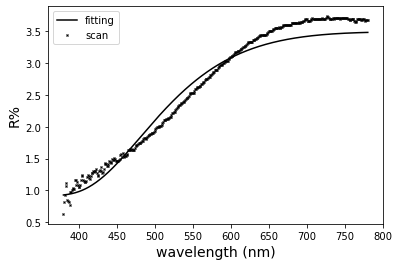

0.3264677450197288


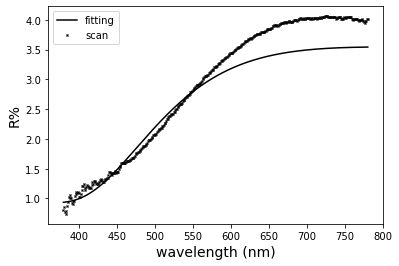

0.36365598473752747


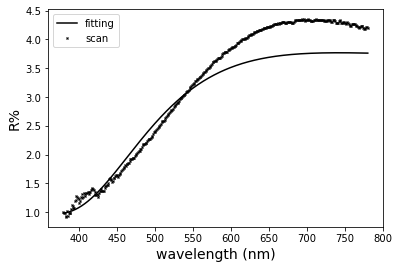

In [18]:
tk = sol.x
plt.plot(wl, 100*R_hypo_05(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_05, 'kx', label = 'scan', markersize = 2)
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
plt.savefig('Nanya_Bonsai_reflection_blacktap_05.png')
print(RMSE(100*R_hypo_05(tk),R_scan_05, 401))
plt.show()
plt.plot(wl, 100*R_hypo_15(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_15, 'kx', label = 'scan', markersize = 2)
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('Nanya_Bonsai_reflection_blacktap_15.png')
print(RMSE(100*R_hypo_15(tk),R_scan_15, 401))
plt.show()
plt.plot(wl, 100*R_hypo_30(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan_30, 'kx', label = 'scan', markersize = 2)
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('Nanya_Bonsai_reflection_blacktap_30.png')
print(RMSE(100*R_hypo_30(tk),R_scan_30, 401))
plt.show()